# Introduction

## Preparations

In [1]:
# import required packages
import warnings

import numpy as np
import pandas as pd
from plotnine import *
from skimpy import skim

import matplotlib.pyplot as plt
# import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
# load data
data = pd.read_csv('../../data/raw/V-Dem-CY-Core-v14.csv')

## Explore the Data

In [3]:
print(data.head())

  country_name country_text_id  country_id  year historical_date  project  \
0       Mexico             MEX           3  1789      1789-12-31        1   
1       Mexico             MEX           3  1790      1790-12-31        1   
2       Mexico             MEX           3  1791      1791-12-31        1   
3       Mexico             MEX           3  1792      1792-12-31        1   
4       Mexico             MEX           3  1793      1793-12-31        1   

   historical                  histname  codingstart  codingend  ...  \
0           1  Viceroyalty of New Spain         1789       2023  ...   
1           1  Viceroyalty of New Spain         1789       2023  ...   
2           1  Viceroyalty of New Spain         1789       2023  ...   
3           1  Viceroyalty of New Spain         1789       2023  ...   
4           1  Viceroyalty of New Spain         1789       2023  ...   

   v2xex_elecleg  v2xps_party  v2xps_party_codelow  v2xps_party_codehigh  \
0            0.0          Na

## Filter data

In [4]:
# Create subset of data with fewer variables
subset_columns = ['country_name', 'year', 'v2x_regime', 'v2x_polyarchy', 'v2x_libdem', 'v2x_civlib', 'v2x_rule', 'v2x_egaldem']
democracy_df = data[subset_columns].copy()
print(democracy_df.head())

  country_name  year  v2x_regime  v2x_polyarchy  v2x_libdem  v2x_civlib  \
0       Mexico  1789         NaN          0.028       0.045       0.221   
1       Mexico  1790         NaN          0.028       0.045       0.221   
2       Mexico  1791         NaN          0.028       0.045       0.221   
3       Mexico  1792         NaN          0.028       0.045       0.221   
4       Mexico  1793         NaN          0.028       0.045       0.221   

   v2x_rule  v2x_egaldem  
0     0.272          NaN  
1     0.272          NaN  
2     0.272          NaN  
3     0.272          NaN  
4     0.272          NaN  


In [5]:
# Filter for observations after 1990
democracy_df_recent = democracy_df[democracy_df['year'] >= 1990].copy()
print(democracy_df_recent.head())

    country_name  year  v2x_regime  v2x_polyarchy  v2x_libdem  v2x_civlib  \
201       Mexico  1990         1.0          0.393       0.191       0.606   
202       Mexico  1991         1.0          0.415       0.202       0.618   
203       Mexico  1992         1.0          0.441       0.216       0.628   
204       Mexico  1993         1.0          0.455       0.221       0.640   
205       Mexico  1994         1.0          0.474       0.261       0.652   

     v2x_rule  v2x_egaldem  
201     0.338        0.193  
202     0.338        0.204  
203     0.338        0.215  
204     0.338        0.220  
205     0.456        0.233  


## Clean the Dataset

In [6]:
# check variable types
print(democracy_df_recent.dtypes)

country_name      object
year               int64
v2x_regime       float64
v2x_polyarchy    float64
v2x_libdem       float64
v2x_civlib       float64
v2x_rule         float64
v2x_egaldem      float64
dtype: object


In [7]:
# adjust variable type to make 'country' variable more efficient (as string rather than object'
democracy_df_recent['country_name'] = democracy_df_recent['country_name'].astype('string')
print(democracy_df_recent.dtypes)

country_name     string[python]
year                      int64
v2x_regime              float64
v2x_polyarchy           float64
v2x_libdem              float64
v2x_civlib              float64
v2x_rule                float64
v2x_egaldem             float64
dtype: object


In [8]:
# transformation of variables
# part I: rename variables - using a list

# create a list with new column names
new_column_names = ['country', 'year', 'regime_type', 'polyarchy', 'liberal_dem', 'civil_liberties', 'rule_of_law', 'egalitarian_dem']

democracy_df_recent.columns = new_column_names


In [9]:
# transform variables: recode from 0-1 to 0.100 scale - using a loop
numeric_columns = democracy_df_recent.select_dtypes(include=['number'])

min_values = numeric_columns.min()
max_values = numeric_columns.max()
print("Min ", min_values, ", Max ", max_values)

Min  year               1990.000
regime_type           0.000
polyarchy             0.013
liberal_dem           0.005
civil_liberties       0.015
rule_of_law           0.009
egalitarian_dem       0.022
dtype: float64 , Max  year               2023.000
regime_type           3.000
polyarchy             0.922
liberal_dem           0.897
civil_liberties       0.976
rule_of_law           0.999
egalitarian_dem       0.886
dtype: float64


In [10]:
transform_variables = ['polyarchy', 'liberal_dem', 'civil_liberties', 'rule_of_law', 'egalitarian_dem']
for variable in transform_variables:
    democracy_df_recent[variable] = democracy_df_recent[variable] * 100
print(democracy_df_recent.head())

    country  year  regime_type  polyarchy  liberal_dem  civil_liberties  \
201  Mexico  1990          1.0       39.3         19.1             60.6   
202  Mexico  1991          1.0       41.5         20.2             61.8   
203  Mexico  1992          1.0       44.1         21.6             62.8   
204  Mexico  1993          1.0       45.5         22.1             64.0   
205  Mexico  1994          1.0       47.4         26.1             65.2   

     rule_of_law  egalitarian_dem  
201         33.8             19.3  
202         33.8             20.4  
203         33.8             21.5  
204         33.8             22.0  
205         45.6             23.3  


In [11]:
# check for NA values
print(democracy_df_recent.isna().sum())

country             0
year                0
regime_type         2
polyarchy           2
liberal_dem        23
civil_liberties     0
rule_of_law         0
egalitarian_dem     2
dtype: int64


# Save Data

In [12]:
# check current directors
import os
print (os.getcwd())

/Users/Anna/Downloads/course_project/code/python


In [13]:
democracy_df_recent.to_csv('../../data/derived/democracy_cleaned_post1990.csv', index=False)

# Outputs

## Summary Statistics

In [14]:
# create summary statistics
summary_stats = democracy_df_recent.describe()
print(summary_stats)

              year  regime_type    polyarchy  liberal_dem  civil_liberties  \
count  6025.000000  6023.000000  6023.000000  6002.000000      6025.000000   
mean   2006.598340     1.525652    50.056085    39.099284        67.324846   
std       9.795875     1.018085    26.752591    26.907504        25.828370   
min    1990.000000     0.000000     1.300000     0.500000         1.500000   
25%    1998.000000     1.000000    26.000000    14.400000        48.400000   
50%    2007.000000     1.000000    49.500000    34.400000        74.400000   
75%    2015.000000     2.000000    75.500000    63.300000        89.500000   
max    2023.000000     3.000000    92.200000    89.700000        97.600000   

       rule_of_law  egalitarian_dem  
count  6025.000000      6023.000000  
mean     53.447751        38.244563  
std      31.151552        24.133081  
min       0.900000         2.200000  
25%      26.200000        18.100000  
50%      53.100000        31.600000  
75%      85.000000        57.95

In [15]:
# a prettier table, as we learned in class...
skim(democracy_df_recent)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6025   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ year                │   0 │      0 │    2007 │   9.796 │   1990 │  1998 │  2007 │   2015 │  2023 │ ▇▇▇▇▇▇  │  │
│ │ regime_type         │   2 │   0.03 │   1.526 │   1.018 │      0 │     1 │     1 │      2 │     3 │ ▅ ▇ ▇▅  │  │
│ │ polyarchy           │   2 │   0.03 │   50.06 │   26.75 │    1.3 │    26 │  49.5 │   75.5 │  92.2 │ ▅▇▅▅▅▇  │  │
│ │ liberal_dem         │  23 │   0.38 │    39.1 │   26.91 │    0.5 │  14.4 │  34.4 │   63.3 │  89.7 │ ▇▆▅▃▃▅  │  │
│ │ civil_liberties     │   0 │      0 │   67.32 │   25.83 │    1.5 │  48.4 │  74.4 │   89.5 │  97.6 │ ▁▂▂▃▃▇  │  │
│ │ rule_of_law         │   0 │      0 │   53.45 │   31.15 │    0.9 │  26.2 │  53.1 │     85 │  99.9 │ ▅▆▅▅▃▇  │  │
│ │ egalitarian_dem     │   2 │   0.03 │   38.24 │   24.13 │    2.2 │  18.1 │  31.6 │  57.95 │  88.6 │ ▆▇▅▃▃▅  │  │
│ └─────────────────────┴─────┴────────┴─────────┴─────────┴────────┴───────┴───────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ country                   │       0 │          0 │                          1.2 │                     7498 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Graphs

Text(0.5, 0, 'Level of Liberal Democracy')

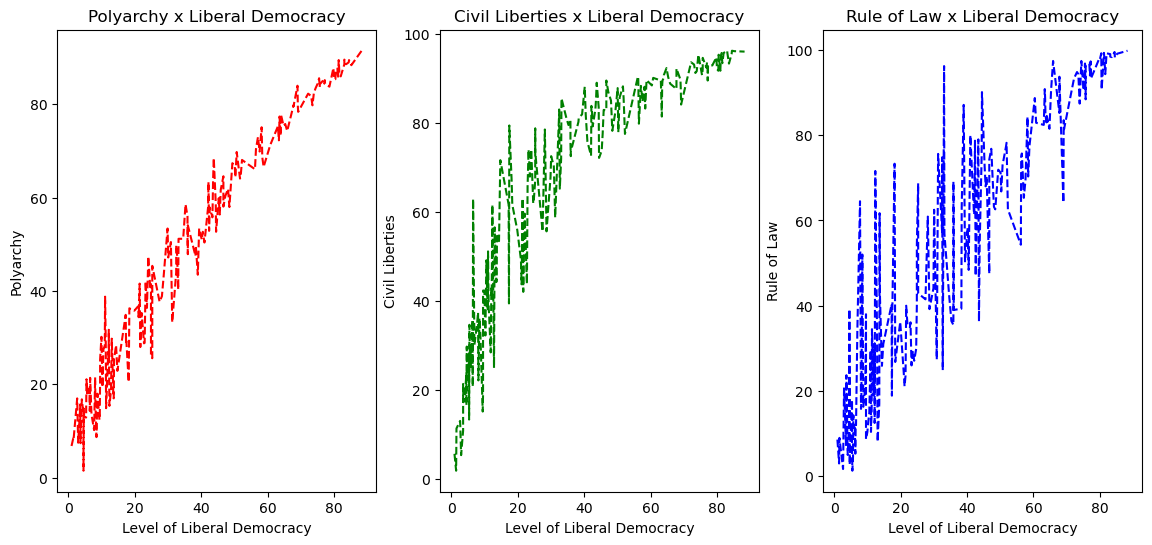

In [16]:
# Plot polyarchy scores, rule of law scores, and civil liberty scores on liberal democracy values in 2023

# get data for this (filter the dataset for 2023 data)
df_2023 = democracy_df_recent[democracy_df_recent['year'] == 2023].copy()
# sort the values in ascending order of liberal democracy to make sure that the graphs do not weirdly jump forwards and backwards
df_2023_sorted = df_2023.sort_values(by='liberal_dem', ascending=True)

plt.figure(figsize=(14, 6))  # Increase the width (the figures were too close to each other and the x-axis too narrow before this)

# create the plot for Polyarchy
plt.subplot(1,3,1)
plt.plot(df_2023_sorted['liberal_dem'], df_2023_sorted['polyarchy'], 'r--')
plt.title('Polyarchy x Liberal Democracy')
plt.ylabel('Polyarchy')
plt.xlabel('Level of Liberal Democracy')

# create the plot for Civil liberties
plt.subplot(1,3,2)
plt.plot(df_2023_sorted['liberal_dem'], df_2023_sorted['civil_liberties'], 'g--')
plt.title('Civil Liberties x Liberal Democracy')
plt.ylabel('Civil Liberties')
plt.xlabel('Level of Liberal Democracy')

# create the plot for Rule of Law
plt.subplot(1,3,3)
plt.plot(df_2023_sorted['liberal_dem'], df_2023_sorted['rule_of_law'], 'b--')
plt.title('Rule of Law x Liberal Democracy')
plt.ylabel('Rule of Law')
plt.xlabel('Level of Liberal Democracy')
